In [1]:
from model import get_resnet_feature_extractor, SelfTrainingModel

(feature_extractor, num_features) = get_resnet_feature_extractor(pretrained=True)
model = SelfTrainingModel(feature_extractor, num_features,
                          num_classes=5,
                          predict_quality=False,
                          predict_correctness=False)

print(model)

SelfTrainingModel(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
      

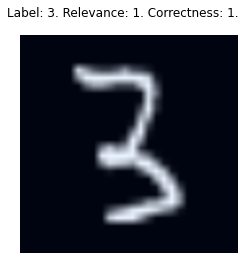

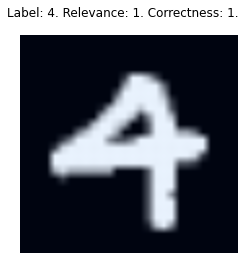

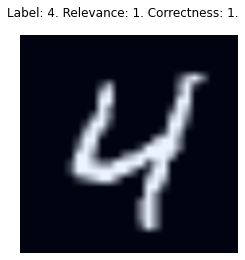

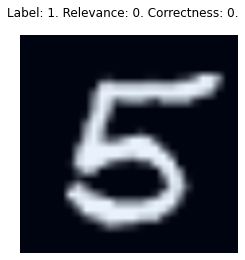

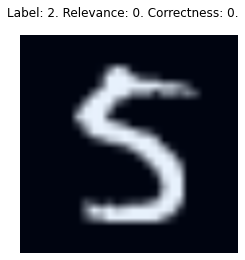

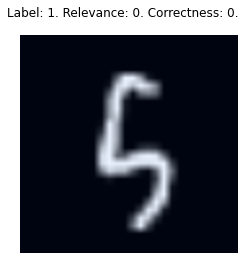

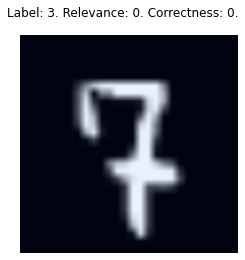

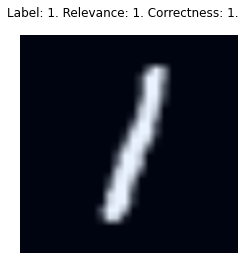

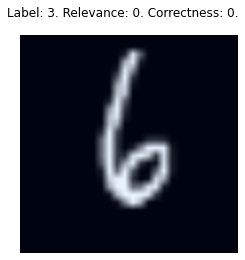

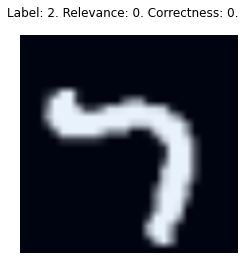

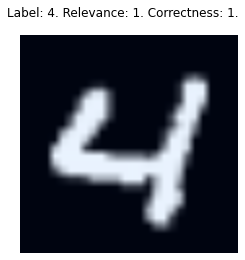

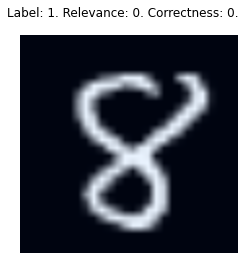

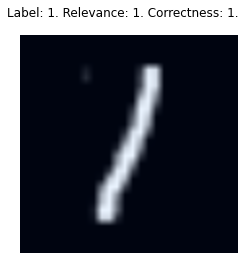

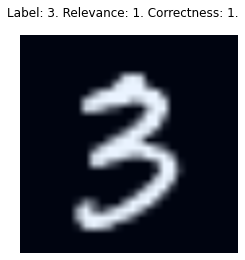

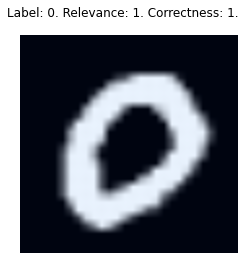

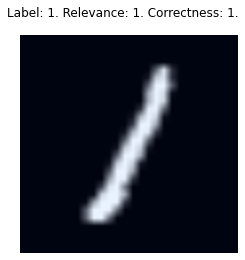

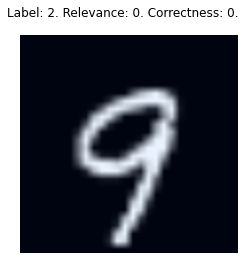

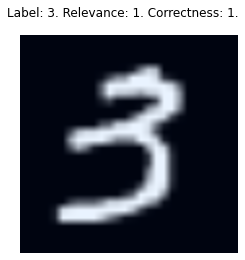

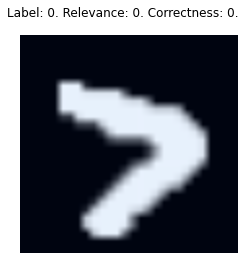

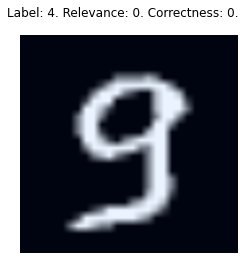

In [2]:
from dataset import LowQualityDataset, GrayscaleToRgb
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor(),
                                GrayscaleToRgb(),
                                transforms.Resize((224, 224)),
                                transforms.Normalize(mean=[.485, .456, .406],
                                                     std=[.229, .224, .225])])

mnist_training_dataset = datasets.MNIST(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform)
low_quality_training_dataset = LowQualityDataset(mnist_training_dataset)
low_quality_training_dataloader = DataLoader(low_quality_training_dataset,
                                             batch_size=64,
                                             shuffle=True)

mnist_testing_dataset = datasets.MNIST(root='./data',
                                       train=False,
                                       download=True,
                                       transform=transform)
low_quality_testing_dataset = LowQualityDataset(mnist_testing_dataset)
low_quality_testing_dataloader = DataLoader(low_quality_testing_dataset,
                                            batch_size=64,
                                            shuffle=True)

low_quality_training_dataset.display_examples(20)

In [3]:
import numpy as np
from tqdm import tqdm
from torch import nn, optim
from train import naive_train_on_batch, naive_eval_on_batch

num_epochs = 10

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
device = 'cpu'
model = model.to(device)

Results = {'train_loss': [],
           'test_loss': [],
           'train_acc': [],
           'test_acc': []}

for epoch in range(num_epochs):
    print('Beginning epoch %d...'%(epoch+1))
    
    # Train over all batches in training dataset and record performance
    train_loss_over_epoch = []
    train_acc_over_epoch = []
    for batch in tqdm(low_quality_training_dataloader):
        loss, acc = naive_train_on_batch(batch, model, loss_fn, optimizer, device)
        train_loss_over_epoch.append(loss)
        train_acc_over_epoch.append(acc)
    Results['train_loss'].append(np.mean(train_loss_over_epoch))
    Results['test_loss'].append(np.mean(test_acc_over_epoch))
    
    # Evaluate over all batches in testing dataset and record performance
    test_loss_over_epoch = []
    test_acc_over_epoch = []
    for batch in tqdm(low_quality_testing_dataloader):
        loss, acc = naive_test_on_batch(batch, model, loss_fn, device)
        test_loss_over_epoch.append(loss)
        test_acc_over_epoch.append(acc)
    Results['test_loss'].append(np.mean(test_loss_over_epoch))
    Results['test_acc'].append(np.mean(test_acc_over_epoch))
    
    # Report results
    print('\tTraining loss: %e'%(Results['train_loss'][-1]))
    print('\tTraining accuracy: %f'%(100*Results['train_acc'][-1]))
    print('\tTesting loss: %e'%(Results['test_loss'][-1]))
    print('\tTesting accuracy: %f'%(100*Results['test_acc'][-1]))

  0%|                                                                                          | 0/938 [00:00<?, ?it/s]

Beginning epoch 1...


  0%|▏                                                                               | 2/938 [00:51<6:45:20, 25.98s/it]


KeyboardInterrupt: 